In [ ]:
##############################
## 1. Project Segmentasyonu
## 2. Project Line Segmentation
## 3. Project Detection - obj. det.
##############################

##############################
## 1. UNet
## 2. SegNet
## 3. YOLOv8
##############################

**Mounting** Drive

In [1]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pwd

'/content'

In [3]:
%cd /content/gdrive/MyDrive/YOLOV8_Proje/Test/Project Detection

/content/gdrive/MyDrive/YOLOV8_Proje/Test/Project Detection


Environment

In [4]:
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 31.1/235.7 GB disk)


Test - Python Implementation

In [ ]:
# # # # # # # # # # # # # # # #
# 1. Library
# 2. Image & Model
# 3. Prediction & Score
# 4. Show Result
# # # # # # # # # # # # # # # #

Training

In [5]:
!unzip data/dataset.zip -d ./data/datasets

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: ./data/datasets/dataset/train/labels/SoldierRU_A_104_png.rf.5e7bb60028c61a89536866ea754a32a5.txt  
  inflating: ./data/datasets/dataset/train/labels/SoldierRU_A_107_png.rf.409d6c7274035fa4d292010eeff19eac.txt  
  inflating: ./data/datasets/dataset/train/labels/SoldierRU_A_108_png.rf.1ef2f70b236a6e21c196800870d91d06.txt  
  inflating: ./data/datasets/dataset/train/labels/SoldierRU_A_10_png.rf.674204da5c66f5aa7590fa34f7a0a72a.txt  
  inflating: ./data/datasets/dataset/train/labels/SoldierRU_A_122_png.rf.cb548aaccdfb0de2f6cfb0afe45291fa.txt  
  inflating: ./data/datasets/dataset/train/labels/SoldierRU_A_127_png.rf.b62f93c64ad4ad646ff2a22a1eb3df05.txt  
  inflating: ./data/datasets/dataset/train/labels/SoldierRU_A_128_png.rf.3546e446369d097897b6004b6aa29bbc.txt  
  inflating: ./data/datasets/dataset/train/labels/SoldierRU_A_129_png.rf.6c68ef3167223d5a0b38c842edb2de77.txt  
  inflating: ./data/datasets/dataset/train/labels/SoldierR

In [9]:
!yolo task=detect mode=train model=yolov8m.pt data=data/data.yaml imgsz=640 workers=10 batch=16 device=0 epochs=100 optimizer=AdamW lr0=0.001 lrf=0.01 augment=True cache=True name=yolov8_son_model

Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=0, workers=10, project=None, name=yolov8_son_model4, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

In [ ]:
# !yolo segment train model=runs/.... resume=True

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow


img_path = "runs/detect/yolov8_son_model4/labels.jpg"
img = cv2.imread(img_path)

cv2_imshow(img)

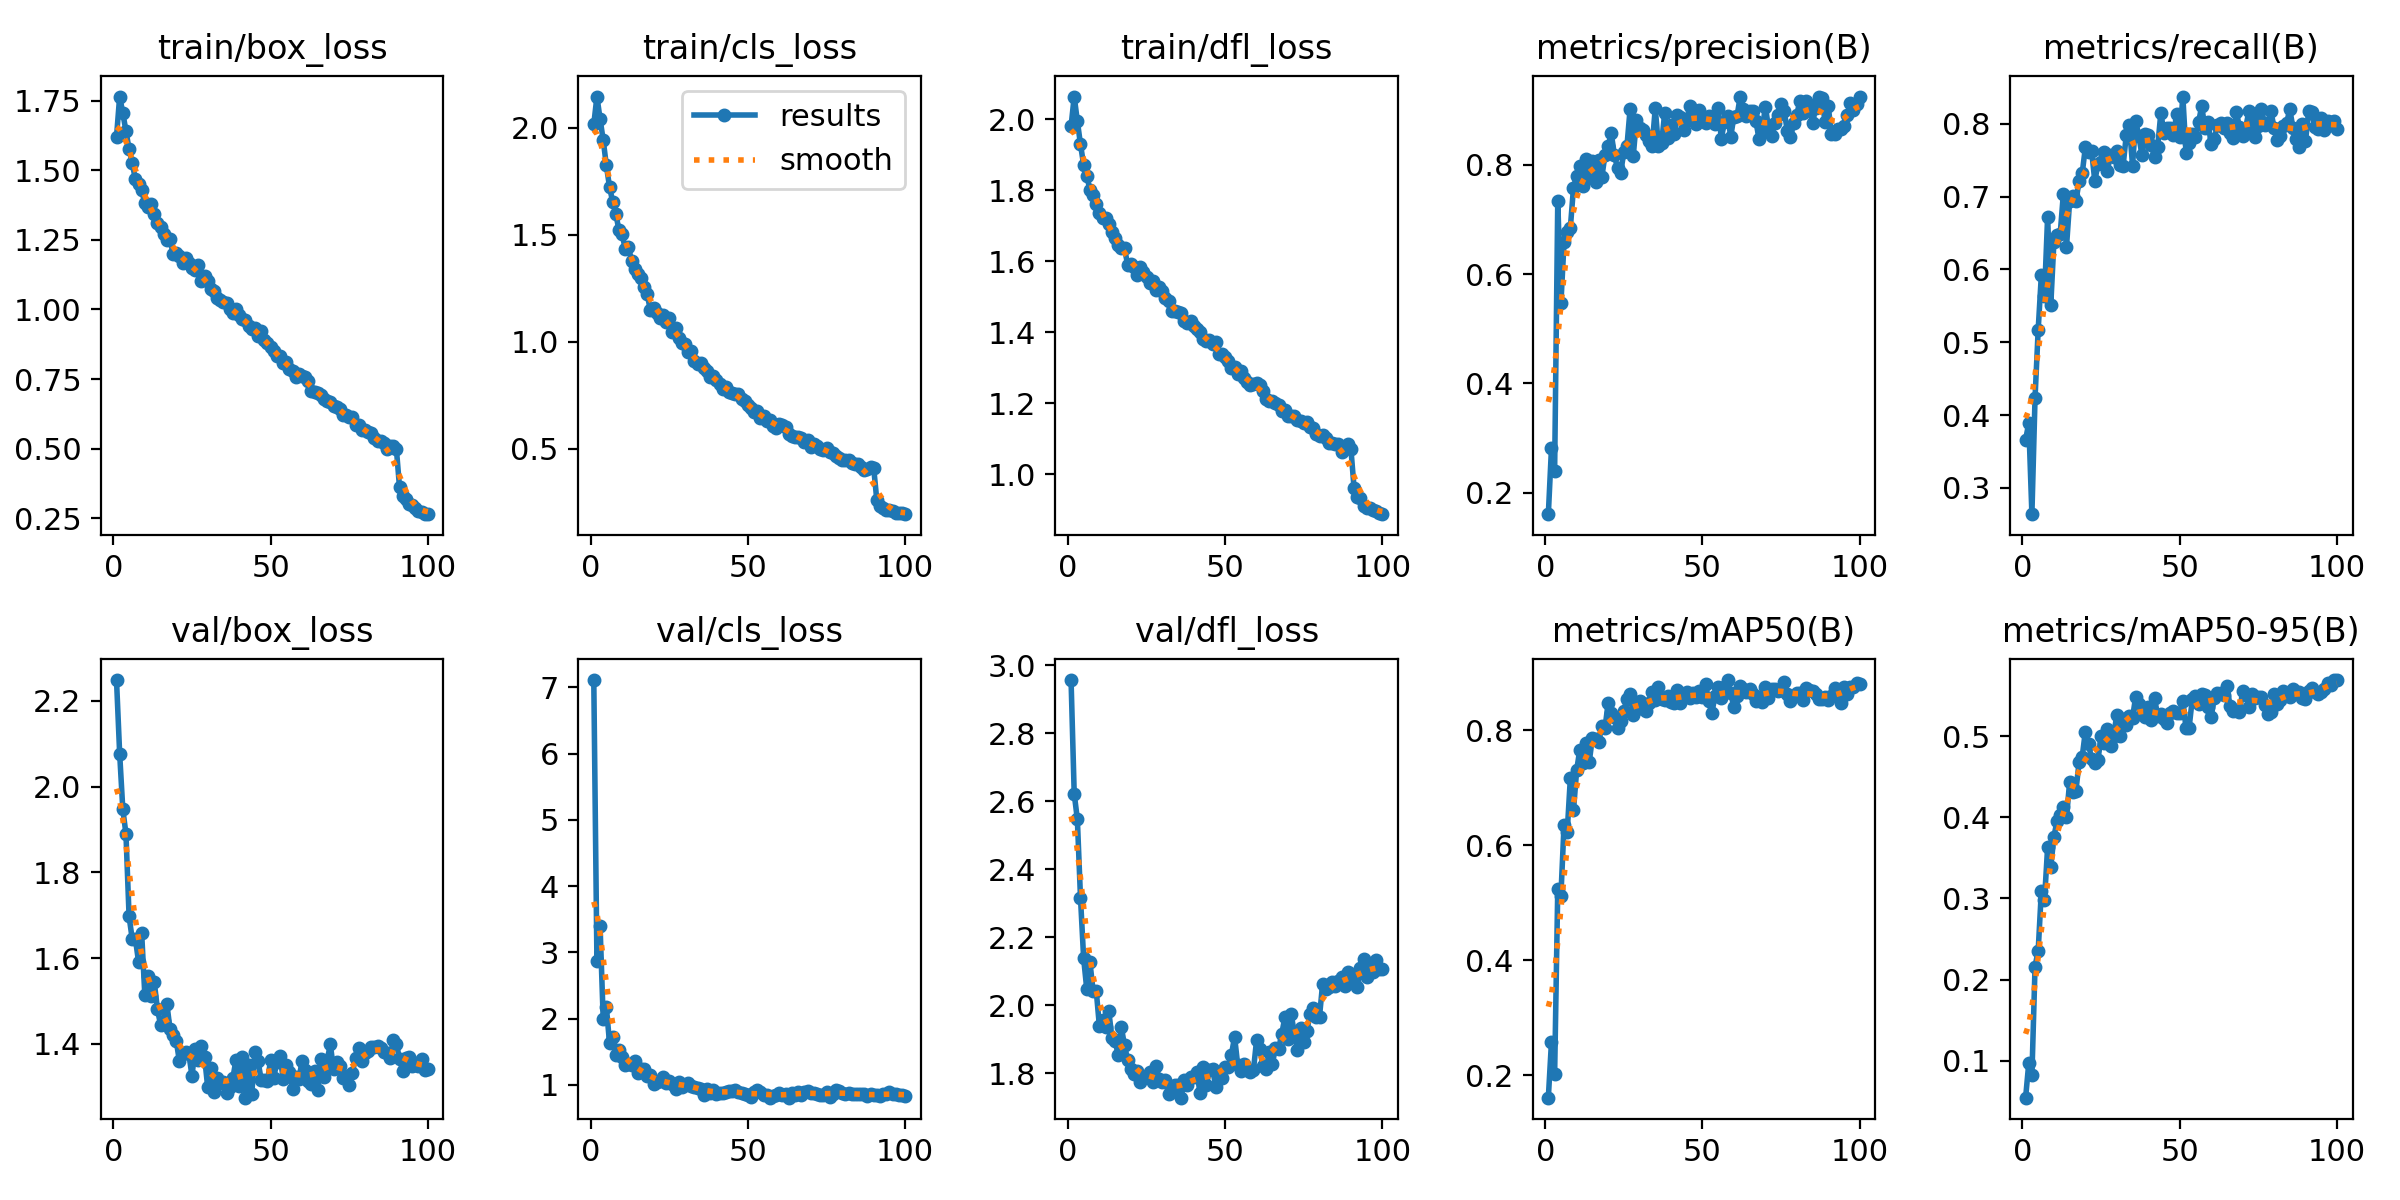

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow


img_path = "runs/detect/yolov8_son/results.png"
img = cv2.imread(img_path)

cv2_imshow(img)

Prediction - CLI

In [ ]:
!yolo detect predict model="runs/detect/yolov8_son/weights/best.pt" source= "/content/gdrive/MyDrive/YOLOV8 Proje/Test/Project Detection/data/datasets/test/images/1012_resim_jpg.rf.f1b1f97d29c438517bcd62560d2a1f7f.jpg"

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,125,494 parameters, 0 gradients, 257.4 GFLOPs

image 1/1 /content/gdrive/MyDrive/YOLOV8 Proje/Test/Project Detection/data/datasets/test/images/1012_resim_jpg.rf.f1b1f97d29c438517bcd62560d2a1f7f.jpg: 640x640 1 tank, 83.6ms
Speed: 4.2ms preprocess, 83.6ms inference, 562.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict13
💡 Learn more at https://docs.ultralytics.com/modes/predict


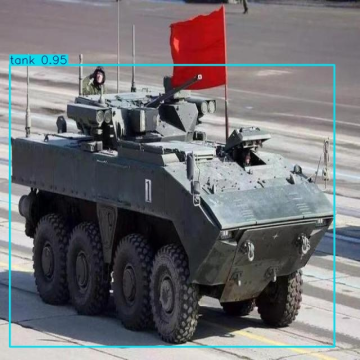

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow


img_path = "/content/gdrive/MyDrive/YOLOV8 Proje/Test/Project Detection/runs/detect/predict13/1012_resim_jpg.rf.f1b1f97d29c438517bcd62560d2a1f7f.jpg"
img = cv2.imread(img_path)
img = imutils.resize(img, width=360)

cv2_imshow(img)

In [ ]:
!yolo segment predict model="runs/segment/yolov8_lane_segmentation11/weights/best.pt" source= "inference/test_images/0.jpg" hide_labels=True boxes=False

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.299999999999999' in the future. Please use 'show_labels' instead.
WARNING ⚠️ 'boxes' is deprecated and will be removed in 'ultralytics 8.299999999999999' in the future. Please use 'show_boxes' instead.
Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs

image 1/1 /content/gdrive/MyDrive/YOLOV8 Proje_Gemi/self-driving/Pantoon Detection/inference/test_images/0.jpg: 416x704 10 lanes, 84.3ms
Speed: 2.7ms preprocess, 84.3ms inference, 2025.8ms postprocess per image at shape (1, 3, 416, 704)
Results saved to runs/segment/predict18
💡 Learn more at https://docs.ultralytics.com/modes/predict


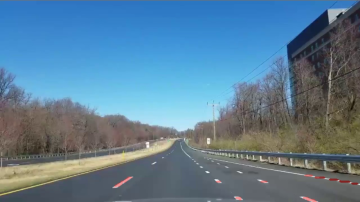

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow


img_path = "runs/segment/predict18/0.jpg"
img = cv2.imread(img_path)
img = imutils.resize(img, width=360)

cv2_imshow(img)

[INFO]... (720, 1280, 3)

0: 704x704 7 lanes, 94.9ms
Speed: 2.0ms preprocess, 94.9ms inference, 2.3ms postprocess per image at shape (1, 3, 704, 704)
Results saved to runs/segment/predict33


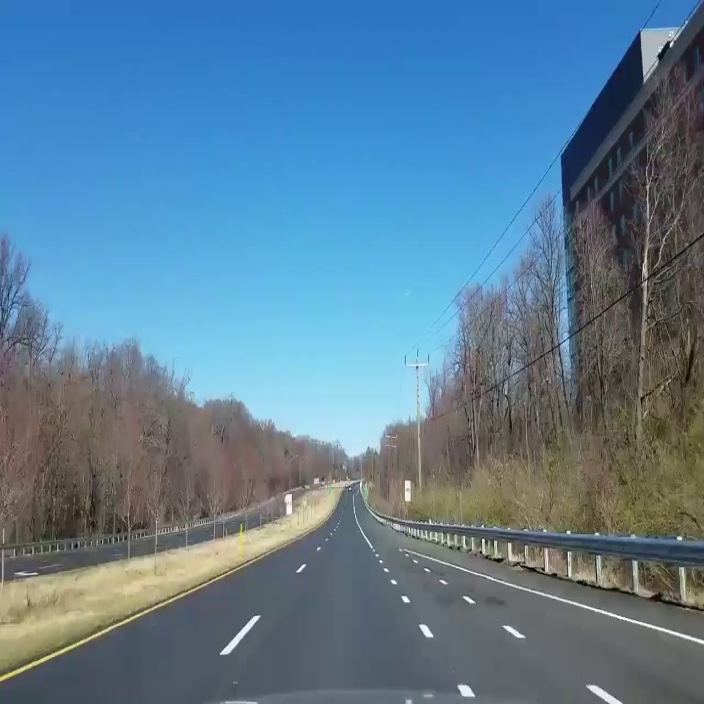

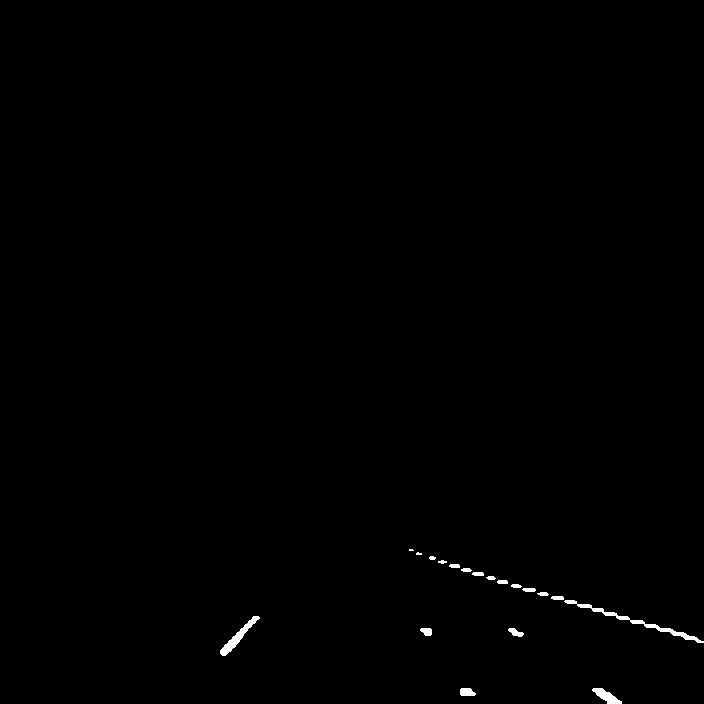

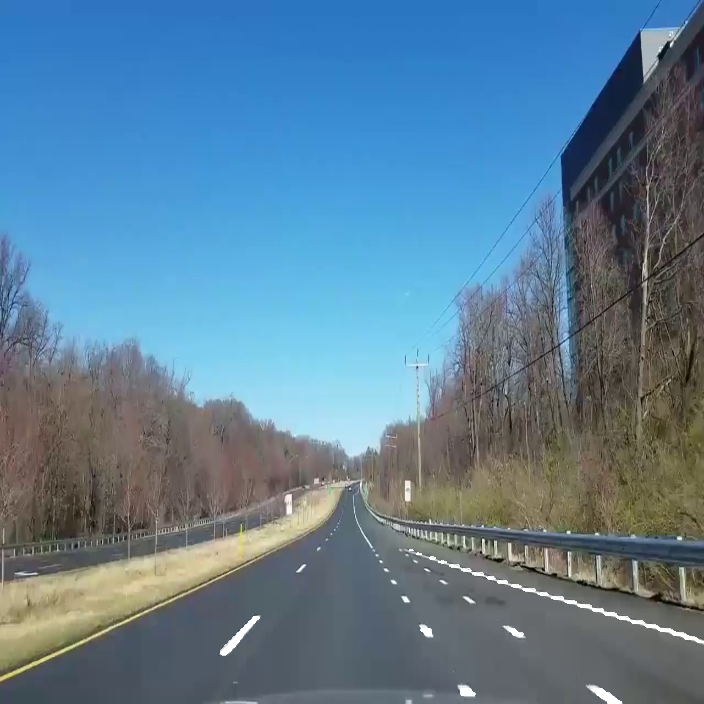

In [ ]:
import cv2
import torch
import imutils

import numpy as np
from ultralytics import YOLO


img_path = "inference/test_images/0.jpg"
model_path = "runs/segment/yolov8_lane_segmentation11/weights/best.pt"

img = cv2.imread(img_path)
print("[INFO]...",img.shape)

img = cv2.resize(img, (704,704))


model = YOLO(model_path) # imgz= 640

results = model.predict(source=img.copy(), save=True, save_txt=False, stream=True)

for result in results:
  masks = result.masks.data.cpu()
  boxes = result.boxes.data.cpu()
  clss = boxes[:, 5]

  road_indices = np.where(clss==0)
  lane_masks = masks[road_indices]

  lane_mask = torch.any(lane_masks, dim=0).int()*255
  lane_mask = lane_mask.cpu().numpy()
  lane_mask = lane_mask.astype(np.uint8)


lane_mask_color = cv2.cvtColor(lane_mask, cv2.COLOR_GRAY2BGR)
result_img = cv2.addWeighted(img, 1, lane_mask_color, 0.5, 0)

cv2_imshow(img)
cv2_imshow(lane_mask)
cv2_imshow(result_img)

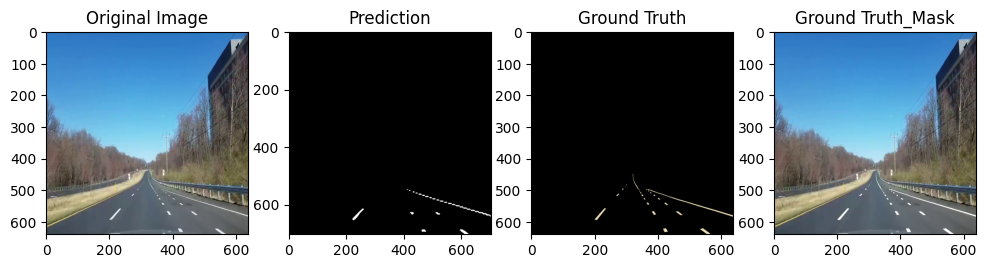

In [ ]:
import cv2
import torch
import imutils

import numpy as np
import matplotlib.pyplot as plt


img_path = "inference/test_images/0.jpg"
img = cv2.imread(img_path) # BGR
img = cv2.resize(img, (640,640))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

output_path= "inference/test_images/ground_truth/ground_truth_output7.png"

ground_truth_path = "inference/test_images/ground_truth/0.png"
ground_truth = cv2.imread(ground_truth_path)
ground_truth = cv2.resize(ground_truth, (640,640))
ground_truth_BGR = cv2.cvtColor(ground_truth, cv2.COLOR_BGR2GRAY)


lane_mask_color = cv2.cvtColor(ground_truth_BGR, cv2.COLOR_GRAY2BGR)
result_img = cv2.addWeighted(img, 1, lane_mask_color, 0.5, 0)


cv2.imwrite(output_path, result_img)

plt.figure(figsize=(12,6))

plt.subplot(141)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(142)
plt.imshow(lane_mask, cmap="gray")
plt.title('Prediction')

plt.subplot(143)
plt.imshow(ground_truth) # RGB
plt.title('Ground Truth')

plt.subplot(144)
plt.imshow(result_img) # RGB
plt.title('Ground Truth_Mask')

plt.show()
cv2.imwrite(output_path, result_img)


Error & Solution

In [ ]:
!yolo segment predict model="runs/segment/yolov8_lane_segmentation11/weights/best.pt" source="inference/test.mp4" --hide_labels=True --boxes=False

WARNING ⚠️ argument '--hide_labels=True' does not require leading dashes '--', updating to 'hide_labels=True'.
WARNING ⚠️ argument '--boxes=False' does not require leading dashes '--', updating to 'boxes=False'.
WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.299999999999999' in the future. Please use 'show_labels' instead.
WARNING ⚠️ 'boxes' is deprecated and will be removed in 'ultralytics 8.299999999999999' in the future. Please use 'show_boxes' instead.
Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs

video 1/1 (frame 1/891) /content/gdrive/MyDrive/YOLOV8 Proje_Gemi/self-driving/Pantoon Detection/inference/test.mp4: 416x704 10 lanes, 84.9ms
video 1/1 (frame 2/891) /content/gdrive/MyDrive/YOLOV8 Proje_Gemi/self-driving/Pantoon Detection/inference/test.mp4: 416x704 7 lanes, 63.9ms
video 1/1 (frame 3/891) /content/gdrive/MyDrive/YO

In [ ]:
from google.colab import files
files.download("runs/segment/predict30/test.avi")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pip install numpy

In [ ]:
import numpy
numpy.__version__

'1.25.2'

In [ ]:
# # # # # # # # # # # #
# 1. Dataset (75 -> 400) ***
# 2. Image Data Augmentation **
# 3. Hyperparameter Tuning *
# # # # # # # # # # # #

In [ ]:

import cv2
import numpy as np
import time
import random
import torch
import imutils

import numpy as np
from ultralytics import YOLO

my_file = open("/content/gdrive/MyDrive/YOLOV8 Proje_Gemi/self-driving/Pantoon Detection/utils/coco.txt", "r")
# reading the file
data = my_file.read()
# replacing end splitting the text | when newline ('\n') is seen.
class_list = data.split("\n")
my_file.close()

# Her sınıf için ayrı bir random renk vermekte.
detection_colors = [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for _ in range(len(class_list))]

total_fps = 0
avarage_fps = 0
num_of_frame = 0
text_color_s = (0, 0, 0)  # siyah
text_color_b = (255, 255, 255)
font = cv2.FONT_HERSHEY_COMPLEX

model_path = "/content/gdrive/MyDrive/YOLOV8 Proje_Gemi/self-driving/Pantoon Detection/runs/segment/yolov8_lane_segmentation11/weights/best.pt"

model = YOLO(model_path) # imgz= 640

frame_wid = 640
frame_hyt = 640
path = "/inference/test.mp4"
cap = cv2.VideoCapture(path)


# video kayıt için fourcc ve VideoWriter tanımlama

if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    start = time.time()
    success, frame = cap.read()

    if not success:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # Run YOLOv5 inference on the frame
    results = model(frame, size=640)
    results.render()  # Inference results are rendered directly onto frame

    if len(results.xyxy[0]) != 0:
        for *xyxy, cls, conf in results.xyxy[0]:
            clsID = int(cls)
            # Draw bounding box
            cv2.rectangle(
                frame,
                (int(xyxy[0]), int(xyxy[1])),
                (int(xyxy[2]), int(xyxy[3])),
                detection_colors[clsID],
                3,
            )
            # Display class name and confidence
            cv2.putText(
                frame,
                f"{class_list[clsID]} {conf:.2f}%",
                (int(xyxy[0]), int(xyxy[1]) - 10),
                font,
                1,
                (255, 255, 255),
                2,
            )
    end = time.time()
    num_of_frame += 1
    fps = 1 / (end - start)
    total_fps = total_fps + fps

    average_fps = total_fps / num_of_frame
    avg_fps = float("{:.2f}".format(average_fps))
    print("fps", avg_fps)

    cv2.putText(frame, f"FPS: {avg_fps}", (20, 40), font, 1.5, text_color_b, thickness=3)
    cv2_imshow(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cv2.destroyAllWindows()



Cannot open camera
Can't receive frame (stream end?). Exiting ...


In [ ]:
from google.colab import files
files.download("/content/kaydedilen_video.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>